<a href="https://colab.research.google.com/github/jdrake13/IE-542/blob/main/IE_542_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import f
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

import pandas as pd

In [77]:
PATH="https://raw.githubusercontent.com/jdrake13/IE-542/main/IE542_Homework%203%20data.csv"
df = pd.read_csv(PATH)

In [78]:
print(df)

   Level1  Level2  Level3
0     5.7     5.9     4.7
1     6.5     5.2     4.1
2     6.1     4.6     4.0
3     5.6     6.8     3.7
4     4.3     4.4     5.6
5     6.1     6.0     6.2
6     6.8     5.7     4.0
7     3.5     6.3     4.6
8     6.1     5.2     6.1


In [79]:
#Problem 2
Level1=np.array(df.Level1)
Level2=np.array(df.Level2)
Level3=np.array(df.Level3)
mean1=np.mean(Level1)
mean2=np.mean(Level2)
mean3=np.mean(Level3)
y=np.mean((Level1+Level2+Level3)/3)
print(y)

5.3259258889259256


In [80]:
#if you need to import the data from files
lorenz_data = np.loadtxt('IE 542_Homework 2_Dataset.txt')

X=lorenz_data[:,0:3]
Y=lorenz_data[:,3:6]

In [81]:


mean_X = np.mean(X)
mean_y1 = np.mean(Y[:,0])
std_X_2 = np.std(X[1])

print('X mean: %.8f' % mean_X)
print('mean of the first column of Y: %.8f' % mean_y1)
print('standard deviation of second row of X: %.8f' % std_X_2)

X mean: 7.64118870
mean of the first column of Y: -10.34098627
standard deviation of second row of X: 0.38456460


In [82]:
#least squares for multiple linear regression
#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-20]
X_test = X[-20:]

y_train = Y[:-20,0]
y_test = Y[-20:,0]

ls_all = linear_model.LinearRegression()
ls_all.fit(X_train, y_train)

#print all the coefficients
print(ls_all.coef_) #these are beta1 to beta10
print(ls_all.intercept_) #this is beta0


#########################################################
#test the model on the test dataset
y_predict = ls_all.predict(X_test)

#mean squared error and R squared on the test data
print('Mean suqared error:%.2f'
     %mean_squared_error(y_test,y_predict))
print('R squared:%.2f'
     %r2_score(y_test,y_predict))

[-1.00000000e+01  1.00000000e+01 -2.00550687e-11]
2.8431106358084435e-09
Mean suqared error:0.00
R squared:1.00


In [97]:
#Problem 3
#least squares

X, y = datasets.load_diabetes(return_X_y=True)
# this loads the diabetes data as #X is the input matrix as in the slides, and y is the output vector


n = X.shape[0]      # number of training samples
p = X.shape[1]      # number of features

#reconstruct the X matrix to include the constant
X_test = X[-20:]


#least squares
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X_test,y_test)

print(model.coef_)

y_predict = model.predict(X_test)

#mean squared error and R squared
print('Mean suqared error:%.2f'
     %mean_squared_error(y_test,y_predict))
print('R squared:%.2f'
     %r2_score(y_test,y_predict))
print(y_predict)

[  169.02748393    56.11796376    35.70038988  -176.9805276
  2552.37678937 -2160.32492285  -952.02181712   -95.40169717
  -726.62317554  -142.67535224]
Mean suqared error:20.80
R squared:0.18
[ -9.72854429  -8.75191845  -6.7295201   -8.44873612 -15.30057946
 -14.52168744  -3.11902196  -4.26605723  -5.66802369  -1.37635144
  -2.73021579  -2.20217833  -7.71307156  -0.60819467   2.17437782
  -5.12154698  -0.92607998  -2.44512239  -4.26827551  -3.80949824]


Error mean: 1.22038750
Error std: 4.39421491


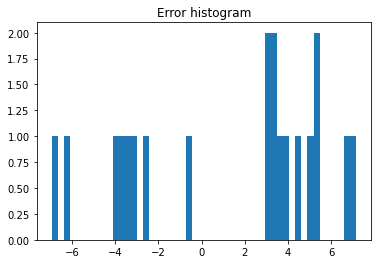

In [101]:
#error normality

error = y_predict - y_test
err_mean = np.mean(error)
err_std = np.std(error)

print('Error mean: %.8f' % err_mean)
print('Error std: %.8f' % err_std)

plt.hist(error, bins = 50)
plt.title('Error histogram')
plt.show()

In [103]:
#hypothesis testing

np.linalg.inv(np.dot(X_test.T, X_test)).shape


# sigma square estimate is SSE/(m-p-1
sigma_square_hat = np.linalg.norm(y_test - model.predict(X_test)) ** 2 / (n-p-1)


var_beta_hat = sigma_square_hat * np.linalg.inv(np.dot(X_test.T, X_test))

#define the alpha value
alpha = 0.01

#find more information of t distribution at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
t_alpha = t.isf(alpha, n - p - 1)
t_half_alpha = t.isf(alpha/2, n - p - 1)
print('t_0.01_n-2: %.8f' % t_alpha)
print('t_0.01_n-2/2: %.8f' % t_half_alpha)

print('\n')


for i in range(p+1):
    print('beta_hat[%d]:%.8f' % (i, model.coef_[i]))
    
    #the diagonal value of the var_beta_hat
    standard_error = var_beta_hat[i,i] ** 0.5   # standard error for beta_0 and beta_1, ** is to the power of
    print(f"Standard Error of (beta_hat[%d]): %.6f" % (i, standard_error))
    
    t_value = model.coef_[i]/standard_error
    print(f"t_value of (beta_hat[{i}]): {t_value}")
   
    #two-sided
    #H1: beta_i neq 0
    p_value_2 = 2 * (1 - t.cdf(np.abs(t_value), n-p-1))
    print('p-value of H0: beta_%d = 0: %.8f' % (i, p_value_2))

    #single-sided
    #H1: beta_i < 0
    p_value_1_less = t.cdf(t_value, n-p-1)
    print('p-value of H0: beta_%d >= 0: %.8f' % (i, p_value_1_less))
    
    #H1: beta_i > 0
    p_value_1_larger = 1 - t.cdf(t_value, n-p-1)
    print('p-value of H0: beta_%d <= 0: %.8f' % (i, p_value_1_larger))
    print('\n')

t_0.01_n-2: 2.33503089
t_0.01_n-2/2: 2.58728432


beta_hat[0]:169.02748393
Standard Error of (beta_hat[0]): 8.741570
t_value of (beta_hat[0]): 19.336054882804415
p-value of H0: beta_0 = 0: 0.00000000
p-value of H0: beta_0 >= 0: 1.00000000
p-value of H0: beta_0 <= 0: 0.00000000


beta_hat[1]:56.11796376
Standard Error of (beta_hat[1]): 7.959982
t_value of (beta_hat[1]): 7.050011574500461
p-value of H0: beta_1 = 0: 0.00000000
p-value of H0: beta_1 >= 0: 1.00000000
p-value of H0: beta_1 <= 0: 0.00000000


beta_hat[2]:35.70038988
Standard Error of (beta_hat[2]): 12.647283
t_value of (beta_hat[2]): 2.822771551719314
p-value of H0: beta_2 = 0: 0.00498150
p-value of H0: beta_2 >= 0: 0.99750925
p-value of H0: beta_2 <= 0: 0.00249075


beta_hat[3]:-176.98052760
Standard Error of (beta_hat[3]): 10.122910
t_value of (beta_hat[3]): -17.483167136632687
p-value of H0: beta_3 = 0: 0.00000000
p-value of H0: beta_3 >= 0: 0.00000000
p-value of H0: beta_3 <= 0: 1.00000000


beta_hat[4]:2552.37678937
Stan

IndexError: ignored

In [104]:
#ANOVA for all coefficients
import pandas as pd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#see more information in https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm

# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

#ols automatically fit the intercept, so we use X


data = pd.DataFrame({'x0': X[:,0],'x1': X[:,1],'x2': X[:,2],
                     'y': y})

# Fit the model
model = ols("y ~ x0 + x1 + x2", data).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     78.94
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           7.77e-41
Time:                        00:40:22   Log-Likelihood:                -2451.6
No. Observations:                 442   AIC:                             4911.
Df Residuals:                     438   BIC:                             4928.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.964     51.321      0.0

In [106]:
#ANOVA for the sum of residuals
#this is what you are required
y_bar = np.mean(Y)

SSR = np.linalg.norm(y_predict - y_bar) ** 2
SSE = np.linalg.norm(y_predict - y_test) ** 2

MSR = SSR / p
MSE = SSE / (n-p-1)

F = MSR/MSE

#p_value = 1 - f.cdf(F, p, n-p-1)

p_value = f.sf(F, p, n-p-1)

print('SSR: %.8f' % SSR)
print('SSE: %.8f' % SSE)
print('MSR: %.8f' % MSR)
print('MSE: %.8f' % MSE)

print('F value: %.8f' % F)
print('p-value: %.8f' % p_value)

SSR: 1774.23898603
SSE: 415.96940649
MSR: 177.42389860
MSE: 0.96512623
F value: 183.83491455
p-value: 0.00000000
